In [ ]:
import pandas as pd
import numpy as np
!pip install wfdb
import wfdb
import ast
from tqdm import tqdm
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_train/train_meta.csv')

if all(col in df.columns for col in ['age', 'height', 'weight', 'nurse', 'site', 'sex']):

    df_cleaned = df.dropna(subset=['age', 'height', 'weight', 'nurse', 'site', 'sex'])

    median_by_sex = df_cleaned.groupby('sex')[['age', 'height', 'weight']].median()
    print("Trung vị của age, height, weight theo giới tính:")
    print(median_by_sex)

    median_nurse_site = df_cleaned[['nurse', 'site']].median()
    print("\nTrung vị của nurse và site:")
    print(median_nurse_site)

else:
    print("Một số cột cần thiết không tồn tại trong dữ liệu.")

Trung vị của age, height, weight theo giới tính:
      age  height  weight
sex                      
0    65.0   174.0    76.0
1    69.0   160.0    63.0

Trung vị của nurse và site:
nurse    6.0
site     1.0
dtype: float64


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_train/train_meta.csv')
df = df.set_index('ecg_id')
median_by_sex = {
    0: {'age': 65.0, 'height': 174.0, 'weight': 76.0},
    1: {'age': 69.0, 'height': 160.0, 'weight': 63.0}
}
median_nurse_site = {'nurse': 6.0, 'site': 1.0}

df['nurse'] = df['nurse'].fillna(median_nurse_site['nurse'])
df['site'] = df['site'].fillna(median_nurse_site['site'])
df['age'] = df.groupby('sex')['age'].transform(lambda x: x.fillna(median_by_sex[x.name]['age']))
df['height'] = df.groupby('sex')['height'].transform(lambda x: x.fillna(median_by_sex[x.name]['height']))
df['weight'] = df.groupby('sex')['weight'].transform(lambda x: x.fillna(median_by_sex[x.name]['weight']))

print(df.head())

         age  sex  height  weight  nurse  site     device  NORM  MI  STTC  \
ecg_id                                                                      
1       56.0    1   160.0    63.0    2.0   0.0  CS-12   E     1   0     0   
2       19.0    0   174.0    70.0    2.0   0.0  CS-12   E     1   0     0   
3       37.0    1   160.0    69.0    2.0   0.0  CS-12   E     1   0     0   
4       24.0    0   174.0    82.0    2.0   0.0  CS-12   E     1   0     0   
5       19.0    1   160.0    70.0    2.0   0.0  CS-12   E     1   0     0   

        ...  sub_ISC_  sub_SEHYP  sub_ISCI  sub_CRBBB  sub_CLBBB  sub_LAO/LAE  \
ecg_id  ...                                                                     
1       ...         0          0         0          0          0            0   
2       ...         0          0         0          0          0            0   
3       ...         0          0         0          0          0            0   
4       ...         0          0         0          0  

In [ ]:
display(df.iloc[:, :20].head(50))

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,HYP,CD,sub_NORM,sub_IMI,sub_STTC,sub_NST_,sub_LVH,sub_LAFB/LPFB,sub_RVH,sub_IRBBB
ecg_id,,,,,,,,,,,,,,,,,,,,
1,56.0,1,160.0,63.0,2.0,0.0,CS-12 E,1,0,0,0,0,1,0,0,0,0,0,0,0
2,19.0,0,174.0,70.0,2.0,0.0,CS-12 E,1,0,0,0,0,1,0,0,0,0,0,0,0
3,37.0,1,160.0,69.0,2.0,0.0,CS-12 E,1,0,0,0,0,1,0,0,0,0,0,0,0
4,24.0,0,174.0,82.0,2.0,0.0,CS-12 E,1,0,0,0,0,1,0,0,0,0,0,0,0
5,19.0,1,160.0,70.0,2.0,0.0,CS-12 E,1,0,0,0,0,1,0,0,0,0,0,0,0
6,18.0,1,160.0,58.0,2.0,0.0,CS-12 E,1,0,0,0,0,1,0,0,0,0,0,0,0
7,54.0,0,174.0,83.0,2.0,0.0,CS-12 E,1,0,0,0,0,1,0,0,0,0,0,0,0
11,20.0,1,160.0,57.0,2.0,0.0,CS-12 E,1,0,0,0,0,1,0,0,0,0,0,0,0
12,43.0,1,160.0,44.0,2.0,0.0,CS-12 E,1,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
columns_to_extract = ['age', 'sex', 'height', 'weight', 'nurse', 'site']
columns_to_extract2 = ['NORM', 'MI', 'STTC', 'CD', 'HYP']
X_train = df[columns_to_extract]
Y_train = df[columns_to_extract2]
display(X_train.head())
display(Y_train.head())

,age,sex,height,weight,nurse,site
ecg_id,,,,,,
1,56.0,1,160.0,63.0,2.0,0.0
2,19.0,0,174.0,70.0,2.0,0.0
3,37.0,1,160.0,69.0,2.0,0.0
4,24.0,0,174.0,82.0,2.0,0.0
5,19.0,1,160.0,70.0,2.0,0.0


,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0


In [ ]:
display(Y_train.head(50))

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
11,1,0,0,0,0
12,1,0,0,0,0


In [ ]:
df_signal = pd.read_csv('/content/drive/MyDrive/data_train/train_signal.csv')
display(df_signal.head())

,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,1,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2,1,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
3,1,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
4,1,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058


In [ ]:
display(df_signal.head(2000))

,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,1,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2,1,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
3,1,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
4,1,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2,0.554,1.320,0.766,-0.938,-0.106,1.043,-1.636,-3.223,-1.784,1.870,1.656,1.376
1996,2,0.316,0.773,0.457,-0.545,-0.071,0.615,-1.470,-2.819,-2.249,0.299,0.511,0.613
1997,2,0.121,0.398,0.277,-0.260,-0.078,0.337,-0.837,-1.568,-1.658,-1.065,-0.492,-0.156
1998,2,-0.326,0.057,0.383,0.135,-0.354,0.219,-0.315,-0.494,-0.501,-0.280,-0.175,-0.071


In [ ]:
print(df_signal.shape)

(17441000, 13)


In [ ]:
display(df_signal.head(50))

,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,1,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2,1,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
3,1,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
4,1,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058
5,1,-0.097,-0.025,0.071,0.061,-0.084,0.023,-0.036,-0.025,-0.009,-0.014,-0.012,-0.052
6,1,-0.119,-0.014,0.106,0.066,-0.112,0.046,-0.029,-0.012,0.005,-0.008,-0.007,-0.048
7,1,-0.096,0.008,0.104,0.044,-0.100,0.056,-0.023,0.003,0.018,0.002,-0.001,-0.041
8,1,-0.048,0.044,0.092,0.002,-0.070,0.068,-0.015,0.018,0.021,0.009,0.005,-0.038
9,1,-0.037,0.045,0.081,-0.004,-0.059,0.063,-0.050,0.009,0.018,0.022,0.009,-0.033


In [ ]:
df_signal_sorted = df_signal.sort_values(by=['ecg_id'])

In [ ]:
df_signal_sorted = df_signal_sorted.reset_index(drop=True)
display(df_signal_sorted.head(100))

,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,1,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,1,-0.053,-0.080,-0.027,0.067,-0.013,-0.053,0.001,-0.029,-0.002,-0.003,-0.031,-0.105
2,1,-0.030,-0.080,-0.050,0.055,0.010,-0.065,-0.001,-0.039,-0.007,-0.007,-0.030,-0.105
3,1,-0.021,-0.079,-0.059,0.050,0.019,-0.069,-0.005,-0.044,-0.015,-0.010,-0.031,-0.105
4,1,-0.032,-0.065,-0.033,0.049,0.001,-0.049,-0.010,-0.034,-0.018,-0.014,-0.025,-0.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.011,-0.028,-0.039,0.008,0.025,-0.033,0.056,0.069,0.004,-0.011,-0.050,-0.081
96,1,0.004,-0.036,-0.041,0.016,0.023,-0.039,0.053,0.067,0.001,-0.027,-0.050,-0.074
97,1,-0.028,-0.069,-0.040,0.048,0.006,-0.054,0.068,0.076,-0.001,-0.033,-0.050,-0.068
98,1,-0.025,-0.062,-0.037,0.044,0.006,-0.049,0.088,0.106,0.001,-0.023,-0.049,-0.061


In [ ]:
df_signal_sorted1 = df_signal_sorted.set_index('ecg_id')
display(df_signal_sorted1.head(100))

,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
ecg_id,,,,,,,,,,,,
1,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,-0.053,-0.080,-0.027,0.067,-0.013,-0.053,0.001,-0.029,-0.002,-0.003,-0.031,-0.105
1,-0.030,-0.080,-0.050,0.055,0.010,-0.065,-0.001,-0.039,-0.007,-0.007,-0.030,-0.105
1,-0.021,-0.079,-0.059,0.050,0.019,-0.069,-0.005,-0.044,-0.015,-0.010,-0.031,-0.105
1,-0.032,-0.065,-0.033,0.049,0.001,-0.049,-0.010,-0.034,-0.018,-0.014,-0.025,-0.101
...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.011,-0.028,-0.039,0.008,0.025,-0.033,0.056,0.069,0.004,-0.011,-0.050,-0.081
1,0.004,-0.036,-0.041,0.016,0.023,-0.039,0.053,0.067,0.001,-0.027,-0.050,-0.074
1,-0.028,-0.069,-0.040,0.048,0.006,-0.054,0.068,0.076,-0.001,-0.033,-0.050,-0.068


In [ ]:
signal_array = df_signal_sorted.iloc[:, 1:].values

In [ ]:
signal_segments = signal_array.reshape((17441, 1000, 12))
print(signal_segments.shape)

(17441, 1000, 12)


In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/data_train/train_meta.csv')
y_labels = df_[['NORM', 'MI', 'STTC', 'CD', 'HYP']].values
assert signal_segments.shape[0] == y_labels.shape[0]
print(y_labels.shape)

(17441, 5)


In [ ]:
X_train = signal_segments
Y_train = y_labels

In [ ]:
df = df[['NORM', 'MI', 'STTC', 'CD', 'HYP']]
df
Y_train = df

In [ ]:
df_signal = pd.read_csv('/content/drive/MyDrive/data_train/test_signal.csv')
df_signal.shape

(2203000, 13)

In [ ]:
df_signal_sorted = df_signal.sort_values(by=['ecg_id']).reset_index(drop=True)
signal_array = df_signal_sorted.iloc[:, 1:].values
signal_segments = signal_array.reshape((2203, 1000, 12))
print(signal_segments.shape)

(2203, 1000, 12)


In [ ]:
df_meta = pd.read_csv('/content/drive/MyDrive/data_train/test_meta.csv')
y_labels = df_meta[['NORM', 'MI', 'STTC', 'CD', 'HYP']].values
assert signal_segments.shape[0] == y_labels.shape[0]
print(y_labels.shape)

AssertionError: 

In [ ]:
X_test = signal_segments
Y_test = y_labels

In [ ]:
import numpy as np


indices = [0, 1, 2, 3, 4]
vc = Y_test[:, indices].sum(axis=0)


percentages = vc / Y_test.shape[0] * 100
print(percentages)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
Y_train

,NORM,MI,STTC,CD,HYP
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
17436,0,0,0,1,0
17437,0,0,1,0,0
17438,1,0,0,0,0
17439,0,0,1,0,0


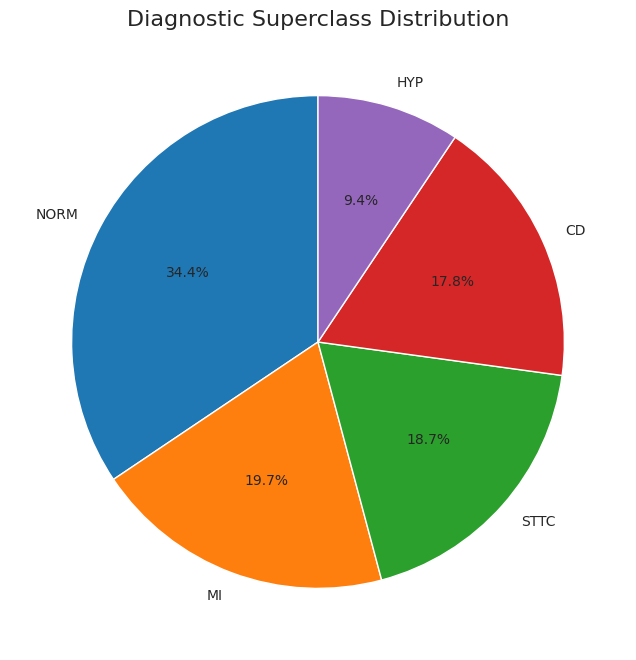

In [ ]:
import matplotlib.pyplot as plt

percentages = [43.75851112, 25.10213345, 23.74035406, 22.6055379, 11.938266]
labels = ['NORM', 'MI', 'STTC', 'CD', 'HYP']

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)

plt.title("Diagnostic Superclass Distribution", fontsize=16)

plt.show()


In [ ]:
import numpy as np


indices = [0, 1, 2, 3, 4]
vc = Y_train[:, indices].sum(axis=0)


percentages = vc / Y_train.shape[0] * 100
print(percentages)


InvalidIndexError: (slice(None, None, None), [0, 1, 2, 3, 4])

In [ ]:
Y_train['NORM'].count()
Y_train['MI'].count()
Y_train['STTC'].count()
Y_train['CD'].count()
Y_train['HYP'].count()
A = Y_train['NORM'].count()
B = Y_train['MI'].count()
C = Y_train['STTC'].count()
D = Y_train['CD'].count()
E = Y_train['HYP'].count()
print(A/A+B+C+D+E, B/A+B+C+D+E, C/A+B+C+D+E, D/A+B+C+D+E, E/A+B+C+D+E)

69765.0 69765.0 69765.0 69765.0 69765.0


In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu
percentages = [43.75851112, 25.10213345, 23.74035406, 22.6055379, 11.938266]
labels = ['NORM', 'MI', 'STTC', 'CD', 'HYP']

# Tạo biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)

# Tiêu đề
plt.title("Diagnostic Superclass Distribution", fontsize=16)

# Hiển thị biểu đồ
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
df_signal = pd.read_csv('/content/drive/MyDrive/data_train/valid_signal.csv')
df_signal.shape

(2193000, 13)

In [ ]:
df_signal_sorted = df_signal.sort_values(by=['ecg_id']).reset_index(drop=True)
signal_array = df_signal_sorted.iloc[:, 1:].values
signal_segments = signal_array.reshape((2193, 1000, 12))
print(signal_segments.shape)

(2193, 1000, 12)


In [ ]:
df_meta = pd.read_csv('/content/drive/MyDrive/data_train/valid_meta.csv')
y_labels = df_meta[['NORM', 'MI', 'STTC', 'CD', 'HYP']].values
assert signal_segments.shape[0] == y_labels.shape[0]
print(y_labels.shape)

(2193, 5)


In [ ]:
X_valid = signal_segments
Y_valid = y_labels

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_valid.shape, Y_valid.shape)

(17441, 1000, 12) (17441, 5) (2203, 1000, 12) (2203, 5) (2193, 1000, 12) (2193, 5)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(1000, 12)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(y_labels.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_valid, Y_valid))


Epoch 1/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 59s 104ms/step - accuracy: 0.2732 - loss: 109.7813 - val_accuracy: 0.4533 - val_loss: 774.7139
Epoch 2/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.2623 - loss: 1342.4369 - val_accuracy: 0.1737 - val_loss: 1373.2294
Epoch 3/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 53s 97ms/step - accuracy: 0.2477 - loss: 3971.7917 - val_accuracy: 0.0292 - val_loss: 9100.4873
Epoch 4/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 89s 109ms/step - accuracy: 0.2409 - loss: 8743.2070 - val_accuracy: 0.1737 - val_loss: 13139.9961
Epoch 5/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 78s 101ms/step - accuracy: 0.2470 - loss: 14187.0527 - val_accuracy: 0.2481 - val_loss: 11095.7480
Epoch 6/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.2517 - loss: 17794.7988 - val_accuracy: 0.4533 - val_loss: 21047.5859
Epoch 7/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 58s 106ms/step - accuracy: 0.2566 - loss: 22159.3965 - val_accuracy: 0.1737 - val_loss: 12906.8926
Epoch 8/10
546/546 ━━━━━━━━━━━━━━━━━━

In [ ]:
Y_train = np.argmax(Y_train, axis=1)
Y_valid = np.argmax(Y_valid, axis=1)
Y_test = np.argmax(Y_test, axis=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(1000, 12)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_valid, Y_valid))


Epoch 1/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4803 - loss: 1.3581 - val_accuracy: 0.5732 - val_loss: 1.1250
Epoch 2/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5882 - loss: 1.0738 - val_accuracy: 0.5891 - val_loss: 1.1177
Epoch 3/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6274 - loss: 0.9627 - val_accuracy: 0.6129 - val_loss: 1.0380
Epoch 4/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6634 - loss: 0.8698 - val_accuracy: 0.6056 - val_loss: 1.1433
Epoch 5/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7078 - loss: 0.7609 - val_accuracy: 0.6165 - val_loss: 1.1001
Epoch 6/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7303 - loss: 0.7008 - val_accuracy: 0.5928 - val_loss: 1.1160
Epoch 7/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7501 - loss: 0.6186 - val_accuracy: 0.6170 - val_loss: 1.1076
Epoch 8/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7827 - loss: 0.5510 - val_accuracy: 0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(1000, 12)),
    MaxPooling1D(pool_size=2),
    Dropout(0.6),
    Conv1D(128, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_valid, Y_valid))

Epoch 1/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4691 - loss: 1.4020 - val_accuracy: 0.5983 - val_loss: 1.1025
Epoch 2/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6018 - loss: 1.0522 - val_accuracy: 0.6352 - val_loss: 1.0006
Epoch 3/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6428 - loss: 0.9475 - val_accuracy: 0.6539 - val_loss: 0.9461
Epoch 4/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6726 - loss: 0.8700 - val_accuracy: 0.6731 - val_loss: 0.9294
Epoch 5/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6940 - loss: 0.8056 - val_accuracy: 0.6676 - val_loss: 0.9231
Epoch 6/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7132 - loss: 0.7538 - val_accuracy: 0.6753 - val_loss: 0.9171
Epoch 7/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7300 - loss: 0.7121 - val_accuracy: 0.6799 - val_loss: 0.8915
Epoch 8/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7482 - loss: 0.6531 - val_accuracy: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(1000, 12)),
    MaxPooling1D(pool_size=2),
    Dropout(0.6),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_valid, Y_valid), callbacks=[early_stopping])

Epoch 1/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4713 - loss: 1.4056 - val_accuracy: 0.5782 - val_loss: 1.1028
Epoch 2/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5856 - loss: 1.0673 - val_accuracy: 0.6170 - val_loss: 1.0149
Epoch 3/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6185 - loss: 0.9815 - val_accuracy: 0.6320 - val_loss: 0.9862
Epoch 4/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6592 - loss: 0.9070 - val_accuracy: 0.6667 - val_loss: 0.9139
Epoch 5/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6824 - loss: 0.8481 - val_accuracy: 0.6749 - val_loss: 0.8958
Epoch 6/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6959 - loss: 0.7980 - val_accuracy: 0.6835 - val_loss: 0.8855
Epoch 7/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7105 - loss: 0.7539 - val_accuracy: 0.6671 - val_loss: 0.9064
Epoch 8/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7244 - loss: 0.7290 - val_accuracy:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(1000, 12)),
    MaxPooling1D(pool_size=2),
    Dropout(0.6),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.6),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_valid, Y_valid), callbacks=[early_stopping])

Epoch 1/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4220 - loss: 1.4957 - val_accuracy: 0.5663 - val_loss: 1.2930
Epoch 2/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5190 - loss: 1.2226 - val_accuracy: 0.5659 - val_loss: 1.2263
Epoch 3/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5452 - loss: 1.1624 - val_accuracy: 0.5691 - val_loss: 1.1647
Epoch 4/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5448 - loss: 1.1330 - val_accuracy: 0.5919 - val_loss: 1.0694
Epoch 5/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5556 - loss: 1.0945 - val_accuracy: 0.5882 - val_loss: 1.0678
Epoch 6/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5718 - loss: 1.0603 - val_accuracy: 0.5832 - val_loss: 1.0603
Epoch 7/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5785 - loss: 1.0409 - val_accuracy: 0.5878 - val_loss: 1.0458
Epoch 8/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5714 - loss: 1.0403 - val_accuracy:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1000, 12)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1000, 12)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-8)
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_valid, Y_valid), callbacks=[ reduce_lr])

Epoch 1/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.4458 - loss: 1.3945 - val_accuracy: 0.5992 - val_loss: 1.0761 - learning_rate: 0.0010
Epoch 2/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5893 - loss: 1.0962 - val_accuracy: 0.6275 - val_loss: 0.9796 - learning_rate: 0.0010
Epoch 3/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6299 - loss: 0.9892 - val_accuracy: 0.6512 - val_loss: 0.9456 - learning_rate: 0.0010
Epoch 4/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6421 - loss: 0.9401 - val_accuracy: 0.6648 - val_loss: 0.9184 - learning_rate: 0.0010
Epoch 5/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6573 - loss: 0.9230 - val_accuracy: 0.6585 - val_loss: 0.9024 - learning_rate: 0.0010
Epoch 6/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6679 - loss: 0.9001 - val_accuracy: 0.6544 - val_loss: 0.9261 - learning_rate: 0.0010
Epoch 7/30
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6732 - loss: 0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1000, 12)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-8)
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, Y_train, epochs=30, batch_size=128, validation_data=(X_valid, Y_valid), callbacks=[ reduce_lr])

Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.4318 - loss: 1.4345 - val_accuracy: 0.5700 - val_loss: 1.1563 - learning_rate: 0.0010
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.5795 - loss: 1.1356 - val_accuracy: 0.5955 - val_loss: 1.1269 - learning_rate: 0.0010
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.6046 - loss: 1.0489 - val_accuracy: 0.6512 - val_loss: 0.9623 - learning_rate: 0.0010
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.6296 - loss: 0.9745 - val_accuracy: 0.6457 - val_loss: 0.9460 - learning_rate: 0.0010
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.6583 - loss: 0.9347 - val_accuracy: 0.6667 - val_loss: 0.9267 - learning_rate: 0.0010
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.6603 - loss: 0.9078 - val_accuracy: 0.6776 - val_loss: 0.8791 - learning_rate: 0.0010
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.6657 - los

In [ ]:
#model = load_model('/content/drive/MyDrive/_Data/model/model2.h5')

loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7137 - loss: 0.8190
Test Loss: 0.8267797231674194
Test Accuracy: 0.7076713442802429


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


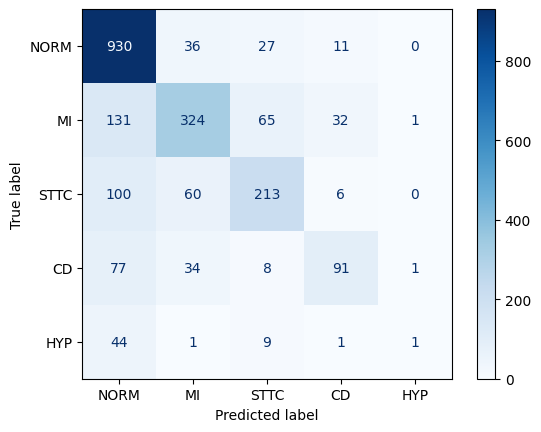

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(Y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NORM', 'MI', 'STTC', 'CD', 'HYP'])
disp.plot(cmap="Blues")

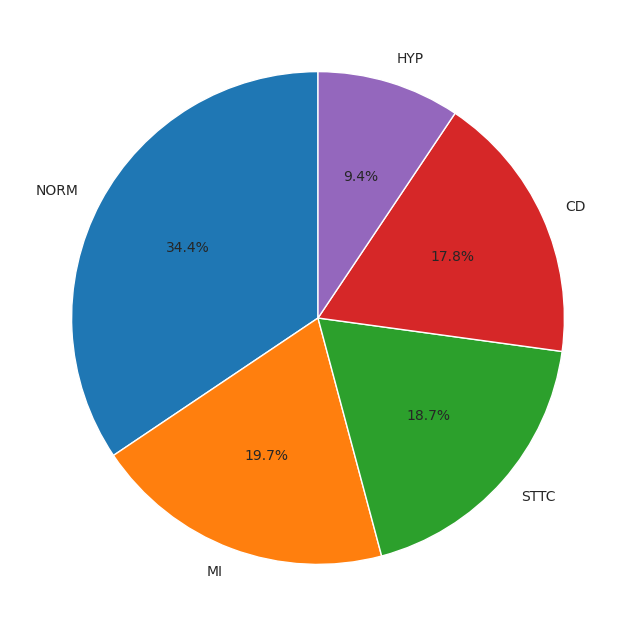

In [ ]:
import matplotlib.pyplot as plt

percentages = [43.75851112, 25.10213345, 23.74035406, 22.6055379, 11.938266]
labels = ['NORM', 'MI', 'STTC', 'CD', 'HYP']

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title("", fontsize=16)

plt.show()


In [ ]:
display(X_test)

array([[[-0.145, -0.097,  0.049, ..., -0.452, -0.269, -0.032],
        [ 0.02 , -0.075, -0.095, ..., -0.054, -0.031, -0.066],
        [ 0.036, -0.073, -0.109, ..., -0.064, -0.04 , -0.069],
        ...,
        [-0.123, -0.097,  0.027, ..., -0.076, -0.071, -0.08 ],
        [-0.138, -0.094,  0.044, ..., -0.074, -0.071, -0.08 ],
        [-0.132, -0.116,  0.017, ..., -0.095, -0.065, -0.08 ]],

       [[-0.009,  0.052,  0.06 , ...,  0.078,  0.036,  0.01 ],
        [-0.027,  0.033,  0.06 , ...,  0.084,  0.06 ,  0.019],
        [-0.02 ,  0.041,  0.061, ...,  0.08 ,  0.061,  0.021],
        ...,
        [ 0.158,  0.249,  0.091, ...,  0.603,  0.49 ,  0.316],
        [ 0.029, -0.039, -0.068, ...,  0.011,  0.053,  0.012],
        [-0.072, -0.403, -0.33 , ..., -0.35 , -0.178, -0.13 ]],

       [[-0.075, -0.055,  0.021, ..., -0.035, -0.035, -0.005],
        [-0.082, -0.055,  0.027, ..., -0.037, -0.028, -0.002],
        [-0.09 , -0.055,  0.035, ..., -0.027, -0.02 ,  0.001],
        ...,
        [-0.

In [ ]:
#Per Sex Superclass Distribution
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))

ax.set_title("Diagnositic Superclass Distribution of Different Sex", fontsize=20)

all_index, all_count, all_values = [], [], []
for sex in y_all.sex.unique():
    vc = y_all.loc[y_all.sex == sex][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [sex]*len(vc)
    #print(all_sex)

df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['sex'] = all_values

ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="sex",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')

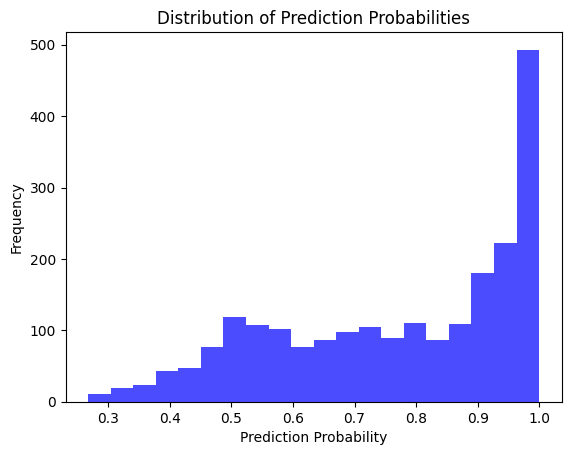

In [ ]:
import matplotlib.pyplot as plt

# Phân phối xác suất
plt.hist(np.max(y_pred_probs, axis=1), bins=20, alpha=0.7, color='blue')
plt.title("Distribution of Prediction Probabilities")
plt.xlabel("Prediction Probability")
plt.ylabel("Frequency")
plt.show()
